# Heart Disease Prediction using Logistic Regression

## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

import warnings
warnings.simplefilter(action='ignore')

<ipython-input-2-c135ddd76d2a>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')

## Data Understanding

In [4]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [7]:
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [8]:
missing_values_percent = ((missing_values / sum(missing_values)) * 100).round(2)
missing_values_percent

glucose            60.16
education          16.28
BPMeds              8.22
totChol             7.75
cigsPerDay          4.50
BMI                 2.95
heartRate           0.16
male                0.00
age                 0.00
currentSmoker       0.00
prevalentStroke     0.00
prevalentHyp        0.00
diabetes            0.00
sysBP               0.00
diaBP               0.00
TenYearCHD          0.00
dtype: float64

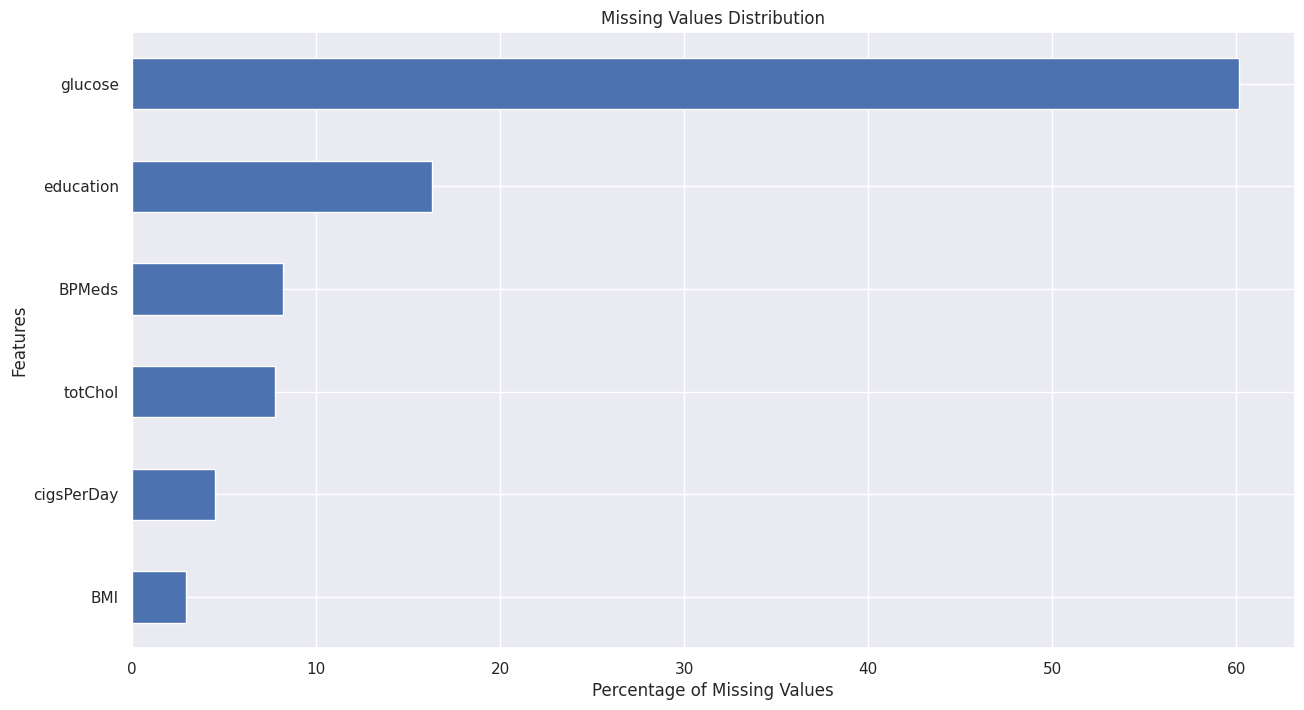

In [9]:
plt.figure(figsize=(15, 8))
missing_values_percent.sort_values(ascending=True).tail(6).plot(kind='barh')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Missing Values Distribution')
plt.show()

In [10]:
df[df.duplicated()]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

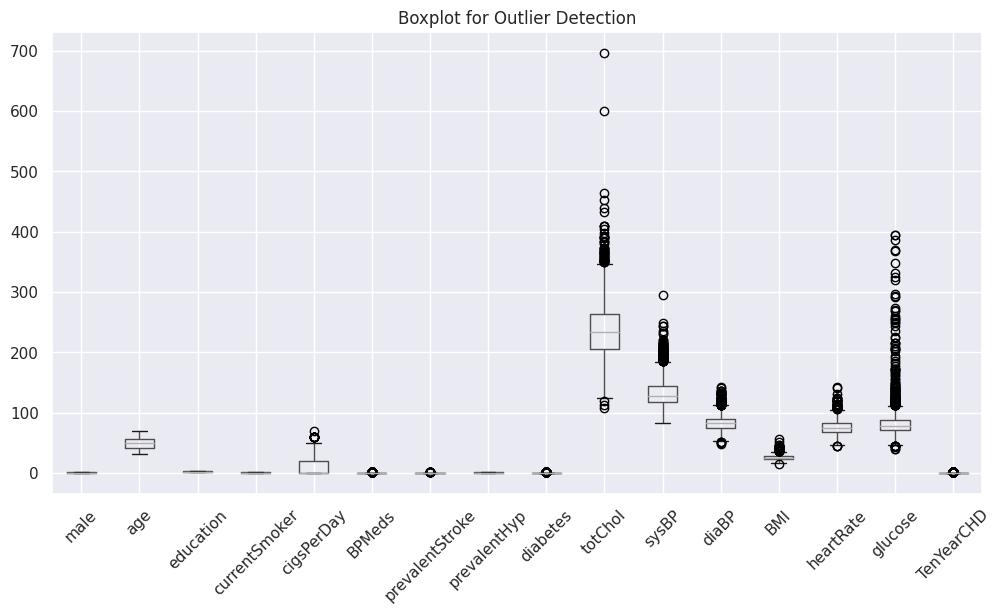

In [11]:
# Visualizing outliers for numerical columns
plt.figure(figsize=(12, 6))
df.boxplot(column=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'])  # Adjust feature names
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

All of the outliers which have more that 1.5x of IQR are justified as heart diseases enhances all of them.

## Data Analysis

In [12]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.corr()['TenYearCHD'].sort_values(ascending=False).round(2).to_frame()

TenYearCHD
TenYearCHD             1.00
age                    0.23
sysBP                  0.22
prevalentHyp           0.18
diaBP                  0.15
glucose                0.13
diabetes               0.10
male                   0.09
BPMeds                 0.09
totChol                0.08
BMI                    0.08
prevalentStroke        0.06
cigsPerDay             0.06
heartRate              0.02
currentSmoker          0.02
education             -0.05

From correlation matrix, we can see that cigsPerDay and currentSmoker are highly correlated so we have to drop the one with low correlation with target vector, i.e, currentSmoker, same case scenario for sys & dia BP and glucose & diabetes. Also, education does not correlate with target, so we have to drop that as well.

In [14]:
cleaned_df = df.drop(columns=['education', 'diabetes', 'diaBP', 'currentSmoker'])
cleaned_df.head()

male  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  totChol  \
0     1   39         0.0     0.0                0             0    195.0   
1     0   46         0.0     0.0                0             0    250.0   
2     1   48        20.0     0.0                0             0    245.0   
3     0   61        30.0     0.0                0             1    225.0   
4     0   46        23.0     0.0                0             0    285.0   

   sysBP    BMI  heartRate  glucose  TenYearCHD  
0  106.0  26.97       80.0     77.0           0  
1  121.0  28.73       95.0     76.0           0  
2  127.5  25.34       75.0     70.0           0  
3  150.0  28.58       65.0    103.0           1  
4  130.0  23.10       85.0     85.0           0

## Model Building

### Splitting

In [15]:
X = cleaned_df.drop(columns=['TenYearCHD'])
y = cleaned_df['TenYearCHD']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Baseline Accuracy

In [17]:
print('Baseline Accuracy :', y_train.value_counts(normalize=True).round(2).max())

Baseline Accuracy : 0.85


### Logistic Regression

In [18]:
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])

## Model Evaluation

In [19]:
pipeline.score(X_train, y_train)

0.8563421828908555

In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       831
           1       0.07      0.53      0.12        17

    accuracy                           0.85       848
   macro avg       0.53      0.69      0.52       848
weighted avg       0.97      0.85      0.90       848



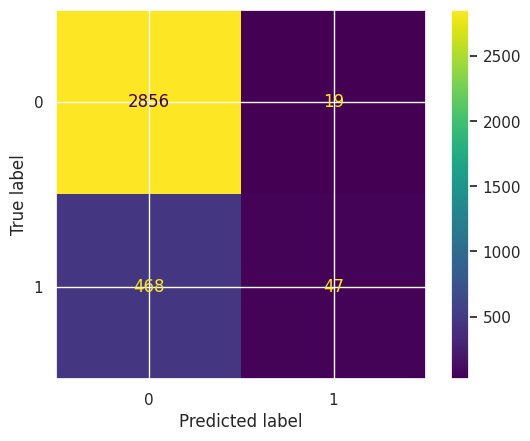

In [22]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_train, y_train);